In [1]:
import signalnet as sn
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
look_back = 20

In [3]:
df = pd.read_csv("data/digital_training_data.csv")
df = df.loc[:500000,:]
scaler = StandardScaler()

df["pre_filter"] = scaler.fit_transform(df["pre_filter"].to_numpy().reshape(-1,1))

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [5]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_ann(X_train, X_test, y_train, y_test, window=look_back)

In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(128, input_shape=(look_back,1)))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1))

In [8]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error", "cosine_proximity"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,145
Trainable params: 118,145
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50


2023-05-02 12:53:27.199754: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7812/7812 [==============================] - 75s 9ms/step - loss: 1.0612e-04 - mean_squared_error: 1.0612e-04 - cosine_proximity: 0.9891
Epoch 2/50
7812/7812 [==============================] - 75s 10ms/step - loss: 7.7584e-05 - mean_squared_error: 7.7584e-05 - cosine_proximity: 0.9906
Epoch 3/50
7812/7812 [==============================] - 76s 10ms/step - loss: 6.9306e-05 - mean_squared_error: 6.9306e-05 - cosine_proximity: 0.9905
Epoch 4/50
7812/7812 [==============================] - 73s 9ms/step - loss: 6.2572e-05 - mean_squared_error: 6.2572e-05 - cosine_proximity: 0.9914
Epoch 5/50
7812/7812 [==============================] - 76s 10ms/step - loss: 5.9189e-05 - mean_squared_error: 5.9189e-05 - cosine_proximity: 0.9914
Epoch 6/50
7812/7812 [==============================] - 78s 10ms/step - loss: 5.6770e-05 - mean_squared_error: 5.6770e-05 - cosine_proximity: 0.9918
Epoch 7/50
7812/7812 [==============================] - 79s 10ms/step - loss: 5.4879e-05 - mean_squared_error: 5.4879e-

In [11]:
import matplotlib.pyplot as plt

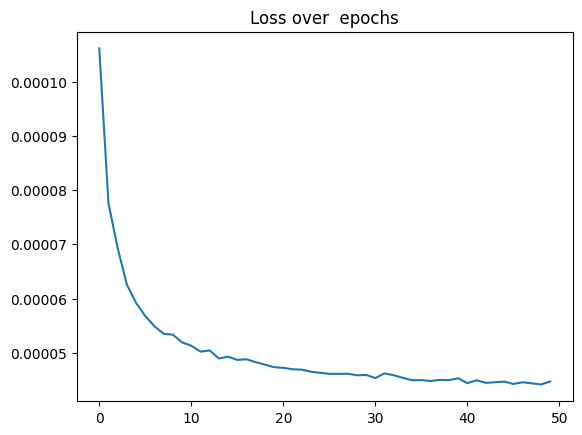

In [12]:
plt.plot(history.history["loss"])
plt.title("Loss over  epochs")
plt.show()

7812/7812 [==============================] - 34s 4ms/step


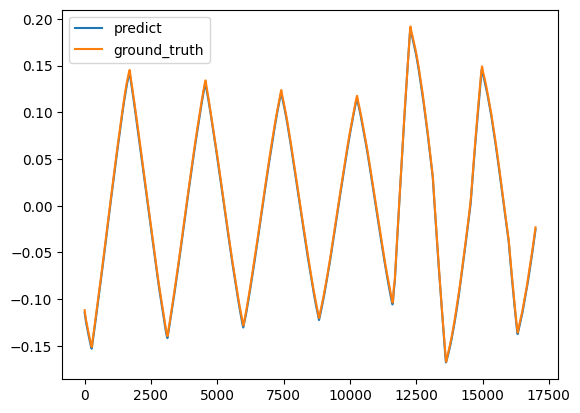

In [13]:
predictions = model.predict(X_test)

plt.plot(predictions[3000:20000], label="predict")
plt.plot(y_test[3000:20000], label="ground_truth")
# plt.plot(X_test[2000:12000,-1], label="ground_truth")
plt.legend()
plt.show()

In [14]:
model.save("lstm_6_mse")

INFO:tensorflow:Assets written to: lstm_6_mse/assets


INFO:tensorflow:Assets written to: lstm_6_mse/assets
